# Learn a Gaussian Filter with a Single Conv Layer (PyTorch)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/thawn/ttt-workshop-cnn/blob/main/book/exercises/conv_gaussian_filter.ipynb)

Train a 1-layer CNN to learn Gaussian blur using a 16x16 px smiley input and its blurred label.


In [1]:
# Setup
import numpy as np

try:
    import scipy.ndimage as spn
    import torch
except Exception:
    import sys, subprocess

    subprocess.check_call([sys.executable, "-m", "pip", "install", "scipy", "torch", "-q"])
    import scipy.ndimage as spn
    import torch

import matplotlib.pyplot as plt

In [2]:
# Create a sample image of a smiley face
image = np.array([
    [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
    [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
    [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0],
    [1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
    [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
    [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0],
    [0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0],
    [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]
], dtype=np.float32)

In [3]:
# Create a gaussian 3x3 kernel
gaussian_kernel = np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1],
]) / 16 

In [4]:

# Create a label image by convolving the image with the kernel using scipy.ndimage.convolve2
label = spn.convolve(image, gaussian_kernel, mode='constant', cval=0.0)

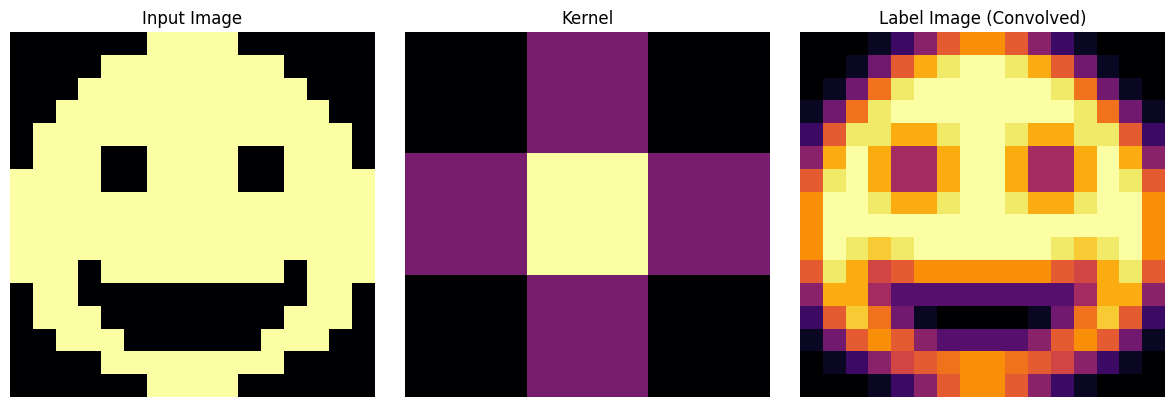

In [5]:
# Plot input, kernel, and label
def plot_images(image, kernel, label):
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    axes[0].imshow(image, cmap='inferno')
    axes[0].set_title('Input Image')

    axes[1].imshow(kernel, cmap='inferno')
    axes[1].set_title('Kernel')

    axes[2].imshow(label, cmap='inferno')
    axes[2].set_title('Label Image (Convolved)')
    for ax in axes:
        ax.axis('off')

    plt.tight_layout()
plot_images(image, gaussian_kernel, label)

# train a single-layer CNN to learn the Gaussian blur


In [6]:
# Convert to torch tensors and add batch and channel dimensions
input_tensor = torch.tensor(image, dtype=torch.float32).unsqueeze(0).unsqueeze(0)  # Shape: (1, 1, H, W)
label_tensor = torch.tensor(label, dtype=torch.float32).unsqueeze(0).unsqueeze(0)  # Shape: (1, 1, H, W)

In [7]:
# Define a single convolutional layer
conv_layer = torch.nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, padding=1, bias=False)

In [8]:
# Define a loss function and optimizer
criterion = torch.nn.MSELoss()

In [9]:
# Define an optimizer
optimizer = torch.optim.Adam(conv_layer.parameters(), lr=0.01)

In [10]:
# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    optimizer.zero_grad()
    output = conv_layer(input_tensor)
    loss = criterion(output, label_tensor)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.6f}')


Epoch [10/1000], Loss: 0.900649
Epoch [20/1000], Loss: 0.223167
Epoch [30/1000], Loss: 0.085297
Epoch [40/1000], Loss: 0.094626
Epoch [50/1000], Loss: 0.076956
Epoch [60/1000], Loss: 0.056355
Epoch [70/1000], Loss: 0.047755
Epoch [80/1000], Loss: 0.040834
Epoch [90/1000], Loss: 0.034357
Epoch [100/1000], Loss: 0.029428
Epoch [110/1000], Loss: 0.025406
Epoch [120/1000], Loss: 0.022105
Epoch [130/1000], Loss: 0.019435
Epoch [140/1000], Loss: 0.017237
Epoch [150/1000], Loss: 0.015408
Epoch [160/1000], Loss: 0.013863
Epoch [170/1000], Loss: 0.012533
Epoch [180/1000], Loss: 0.011369
Epoch [190/1000], Loss: 0.010334
Epoch [200/1000], Loss: 0.009401
Epoch [210/1000], Loss: 0.008553
Epoch [220/1000], Loss: 0.007777
Epoch [230/1000], Loss: 0.007064
Epoch [240/1000], Loss: 0.006408
Epoch [250/1000], Loss: 0.005805
Epoch [260/1000], Loss: 0.005250
Epoch [270/1000], Loss: 0.004741
Epoch [280/1000], Loss: 0.004274
Epoch [290/1000], Loss: 0.003847
Epoch [300/1000], Loss: 0.003458
Epoch [310/1000], L

In [11]:
# Get the learned kernel
learned_kernel = conv_layer.weight.detach().squeeze().numpy()

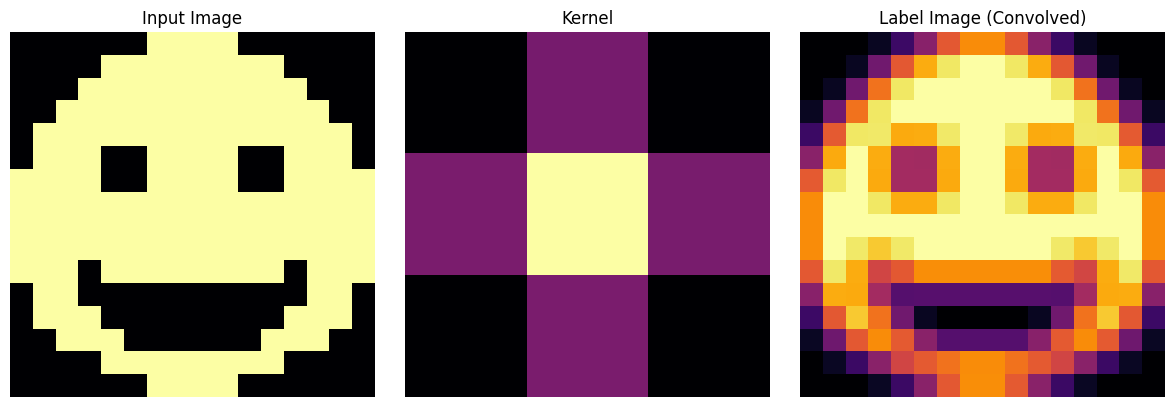

In [12]:
# Plot the input, learned kernel, and output after training
output_image = output.detach().squeeze().numpy()
plot_images(image, learned_kernel, output_image)

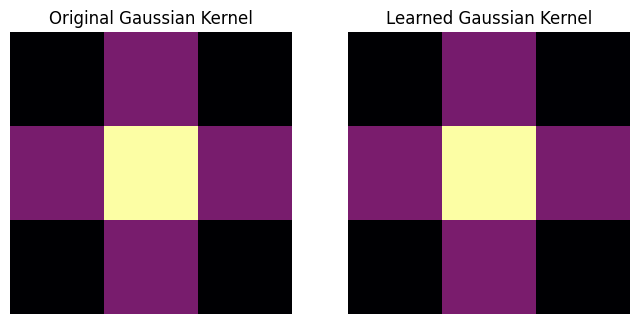

In [13]:
# Plot the original and learned kernels side by side
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].imshow(gaussian_kernel, cmap='inferno')
axes[0].set_title('Original Gaussian Kernel')
axes[0].axis('off')
axes[1].imshow(learned_kernel, cmap='inferno')
axes[1].set_title('Learned Gaussian Kernel')
axes[1].axis('off')
plt.show()